In [53]:
import platform
if platform.system() == 'Linux':
    %run '/home/jonasmaziero/Dropbox/GitHub/jupyterQ/states.ipynb'
    %run '/home/jonasmaziero/Dropbox/GitHub/jupyterQ/jupyterQ.ipynb'
else:
    %run '/Users/jonasmaziero/Dropbox/GitHub/jupyterQ/states.ipynb'
    %run '/Users/jonasmaziero/Dropbox/GitHub/jupyterQ/jupyterQ.ipynb'

## 2-qubit state 'reconstruction' from experimental data
General two-qubit state
\begin{equation}
\rho=\frac{1}{4}\sum_{j,k=0}^{3}c_{j,k}\sigma_{j}\otimes\sigma_{k},
\end{equation}
$\sigma_{0}$ is the indentity 2x2 and $\sigma_{j=1,2,3}$ are the Pauli matrices. $c_{j,k}=Tr(\rho\sigma_{j}\otimes\sigma_{k})=\langle \sigma_{j}\otimes\sigma_{k}\rangle_{\rho}$. $Tr(\rho)=1\Rightarrow c_{0,0}=1$. 
<br> All $\sigma_{j}$, but $\sigma_{0}$, have spectrum $\pm1$. So, for $j,k\ne0$,
\begin{align}
c_{j,k} & = (+1)(+1)pr(j_{+},k_{+})+(+1)(-1)pr(j_{+},k_{-})+(-1)(+1)pr(j_{-},k_{+})+(-1)(-1)pr(j_{-},k_{-}) \\
& = pr(j_{+},k_{+})+pr(j_{-},k_{-})-\left(pr(j_{+},k_{-})+pr(j_{-},k_{+})\right).
\end{align}
For the local observables,
\begin{align}
& c_{j,0}=\langle \sigma_{j}\otimes\sigma_{0}\rangle_{\rho}=\langle \sigma_{j}\rangle_{\rho_{a}} = pr(j_{+})-pr(j_{-}), \\
& c_{0,k}=\langle \sigma_{0}\otimes\sigma_{k}\rangle_{\rho}=\langle \sigma_{k}\rangle_{\rho_{b}} = pr(k_{+})-pr(k_{-}),
\end{align}
we need only the local probabilities
\begin{align}
& pr(j_{\pm}) = pr(j_{\pm},k_{+}) + pr(j_{\pm},k_{-}), \\
& pr(k_{\pm}) = pr(j_{+},k_{\pm}) + pr(j_{-},k_{\pm}).
\end{align}
i.e.,
\begin{align}
& c_{j,0} = pr(j_{+},k_{+}) + pr(j_{+},k_{-}) - \left(pr(j_{-},k_{+}) + pr(j_{-},k_{-})\right), \\
& c_{0,k} = pr(j_{+},k_{+}) + pr(j_{-},k_{+}) - \left(pr(j_{+},k_{-}) + pr(j_{-},k_{-})\right).
\end{align}
Below these probabilities are aproximated by $pr(j,k)=n_{j,k}/n_{s}$, where $n_{s}$ is the total number of samples and $n_{j,k}$ is the number of times a particular combination of values is obtained.

The data we from IBM QC comes something like<br>
"c[5]","n" <br>
"00000",1397<br>
"00100",2897<br>
"10000",3013<br>
"10100",885<br>
The 1st column is the qubits measured and the 2nd column is the counting.

In [79]:
def tomo2qb(path):
    ns = 8192.0
    CM = np.zeros((4,4))
    CM[0,0] = 1.0
    #path = "/Users/jonasmaziero/Dropbox/Research/IBM_QC/scp_tel/experiment/tomography_BDS/c1_06/"
    fname = path + "XX.csv"
    nXX = np.genfromtxt(fname, delimiter=",", skip_header=1)
    CM[1,1] = ((nXX[0,1] + nXX[3,1]) - (nXX[1,1] + nXX[2,1]))/ns
    CM[1,0] = ((nXX[0,1] + nXX[2,1]) - (nXX[1,1] + nXX[3,1]))/ns
    CM[0,1] = ((nXX[0,1] + nXX[1,1]) - (nXX[2,1] + nXX[3,1]))/ns
    fname = path + "XY.csv"
    nXY = np.genfromtxt(fname, delimiter=",", skip_header=1)
    CM[1,2] = ((nXY[0,1] + nXY[3,1]) - (nXY[1,1] + nXY[2,1]))/ns
    fname = path + "XZ.csv"
    nXZ = np.genfromtxt(fname, delimiter=",", skip_header=1)
    CM[1,3] = ((nXZ[0,1] + nXZ[3,1]) - (nXZ[1,1] + nXZ[2,1]))/ns
    fname = path + "YX.csv"
    nYX = np.genfromtxt(fname, delimiter=",", skip_header=1)
    CM[2,1] = ((nYX[0,1] + nYX[3,1]) - (nYX[1,1] + nYX[2,1]))/ns
    fname = path + "YY.csv"
    nYY = np.genfromtxt(fname, delimiter=",", skip_header=1)
    CM[2,2] = ((nYY[0,1] + nYY[3,1]) - (nYY[1,1] + nYY[2,1]))/ns
    CM[2,0] = ((nYY[0,1] + nYY[2,1]) - (nYY[1,1] + nYY[3,1]))/ns
    CM[0,2] = ((nYY[0,1] + nYY[1,1]) - (nYY[2,1] + nYY[3,1]))/ns
    fname = path + "YZ.csv"
    nYZ = np.genfromtxt(fname, delimiter=",", skip_header=1)
    CM[2,3] = ((nYZ[0,1] + nYZ[3,1]) - (nYZ[1,1] + nYZ[2,1]))/ns
    fname = path + "ZX.csv"
    nZX = np.genfromtxt(fname, delimiter=",", skip_header=1)
    CM[3,1] = ((nZX[0,1] + nZX[3,1]) - (nZX[1,1] + nZX[2,1]))/ns
    fname = path + "ZY.csv"
    nZY = np.genfromtxt(fname, delimiter=",", skip_header=1)
    CM[3,2] = ((nZY[0,1] + nZY[3,1]) - (nZY[1,1] + nZY[2,1]))/ns
    fname = path + "ZZ.csv"
    nZZ = np.genfromtxt(fname, delimiter=",", skip_header=1)
    CM[3,3] = ((nZZ[0,1] + nZZ[3,1]) - (nZZ[1,1] + nZZ[2,1]))/ns
    CM[3,0] = ((nZZ[0,1] + nZZ[2,1]) - (nZZ[1,1] + nZZ[3,1]))/ns
    CM[0,3] = ((nZZ[0,1] + nZZ[1,1]) - (nZZ[2,1] + nZZ[3,1]))/ns
    return rho2qb(CM)

In [59]:
#CM = Matrix([[1,0,0,0],[0,c1,0,0],[0,0,c2,0],[0,0,0,c3]])
#rho2qb(CM)

#### Bar plot of a two-qubit density matrix (standard basis)

In [76]:
def plot_rho2qb(rho):
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    result = [rho[0,0], rho[0,1], rho[0,2], rho[0,3],
              rho[1,0], rho[1,1], rho[1,2], rho[1,3],
              rho[2,0], rho[2,1], rho[2,2], rho[2,3],
              rho[3,0], rho[3,1], rho[3,2], rho[3,3]]
    result = np.array(result, dtype=np.float)
    fig = plt.figure(figsize=(5, 5), dpi=150)
    ax1 = fig.add_subplot(111, projection='3d')
    xlabels = np.array([r'$|00\rangle$', r'$|01\rangle$',
                        r'$|10\rangle$', r'$|11\rangle$'])
    xpos = np.arange(xlabels.shape[0])
    ylabels = np.array([r'$|00\rangle$', r'$|01\rangle$',
                        r'$|10\rangle$', r'$|11\rangle$'])
    ypos = np.arange(ylabels.shape[0])
    xposM, yposM = np.meshgrid(xpos, ypos, copy=False)
    zpos = result
    dx = 0.5
    dy = 0.5
    dz = zpos
    ax1.set_xlim(0, 3.5)
    ax1.set_ylim(0, 3.5)
    ax1.set_zlim(-0.5, 0.5)
    ax1.view_init(elev=10, azim=-30)
    ax1.w_xaxis.set_ticks(xpos + dx/2.0)
    ax1.w_xaxis.set_ticklabels(xlabels)
    ax1.w_yaxis.set_ticks(ypos + dy/2.0)
    ax1.w_yaxis.set_ticklabels(ylabels)
    values = np.linspace(0.2, 1.0, xposM.ravel().shape[0])
    colors = cm.rainbow(values)
    ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
    plt.show()

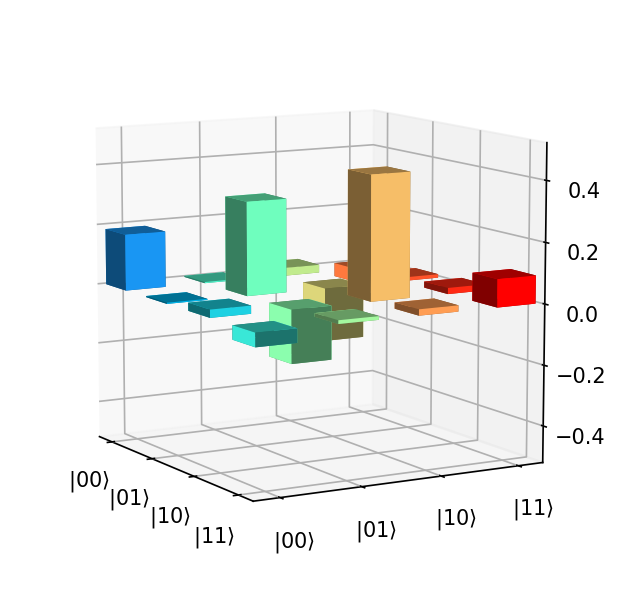

In [77]:
'''
if platform.system() == 'Linux':
    path = '/home/jonasmaziero/Dropbox/Research/ibm/bds/werner_qx2/dados_plot/10/'
else:
    path = '/Users/jonasmaziero/Dropbox/Research/ibm/bds/werner_qx2/dados_plot/10/'
rho = tomo2qb(path)
plot_rho2qb(re(rho))
'''


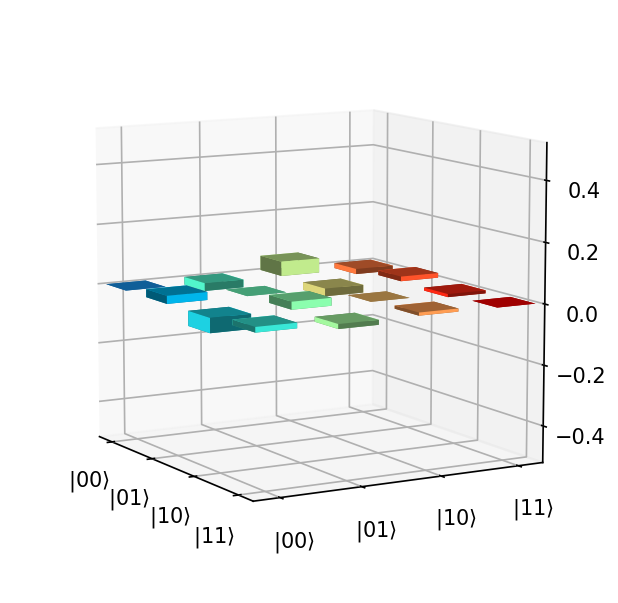

In [73]:
#plot_rho2qb(im(rho))

## 1-qubit states 'reconstruction'
Here
\begin{equation}
\rho=\frac{1}{2}\sum_{j=0}^{3}r_{j}\sigma_{j}.
\end{equation}
$r_{0}=1$ and 
\begin{equation}
r_{j}=pr(j_{+})-pr(j_{-}).
\end{equation}
The code is similar and is given below.

In [80]:
def tomo1qb(path):
    ns = 8192.0
    fname = path + "X.csv"
    nX = np.genfromtxt(fname, delimiter=",", skip_header=1)
    r1 = (nX[0,1] - nX[1,1])/ns
    fname = path + "Y.csv"
    nY = np.genfromtxt(fname, delimiter=",", skip_header=1)
    r2 = (nY[0,1] - nY[1,1])/ns
    fname = path + "Z.csv"
    nZ = np.genfromtxt(fname, delimiter=",", skip_header=1)
    r3 = (nZ[0,1] - nZ[1,1])/ns
    return rho1qb(r1, r2, r3)

In [78]:
def plot_rho1qb(rho):
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    result = [rho[0,0], rho[0,1],
              rho[1,0], rho[1,1]]
    result = np.array(result, dtype=np.float)
    fig = plt.figure(figsize=(5, 5), dpi=150)
    ax1 = fig.add_subplot(111, projection='3d')
    xlabels = np.array([r'$|0\rangle$', r'$|1\rangle$'])
    xpos = np.arange(xlabels.shape[0])
    ylabels = np.array([r'$|1\rangle$', r'$|0\rangle$'])
    ypos = np.arange(ylabels.shape[0])
    xposM, yposM = np.meshgrid(xpos, ypos, copy=False)
    zpos = result
    dx = 0.5
    dy = 0.5
    dz = zpos
    ax1.set_xlim(0, 3.5)
    ax1.set_ylim(0, 3.5)
    ax1.set_zlim(-0.5, 0.5)
    ax1.w_xaxis.set_ticks(xpos + dx/2.0)
    ax1.w_xaxis.set_ticklabels(xlabels)
    ax1.w_yaxis.set_ticks(ypos + dy/2.0)
    ax1.w_yaxis.set_ticklabels(ylabels)
    values = np.linspace(0.2, 1.0, xposM.ravel().shape[0])
    colors = cm.rainbow(values)
    ax1.bar3d(xposM.ravel(), yposM.ravel(), dz*0, dx, dy, dz, color=colors)
    plt.show()